Problem set 1 

<BarContainer object of 4 artists>

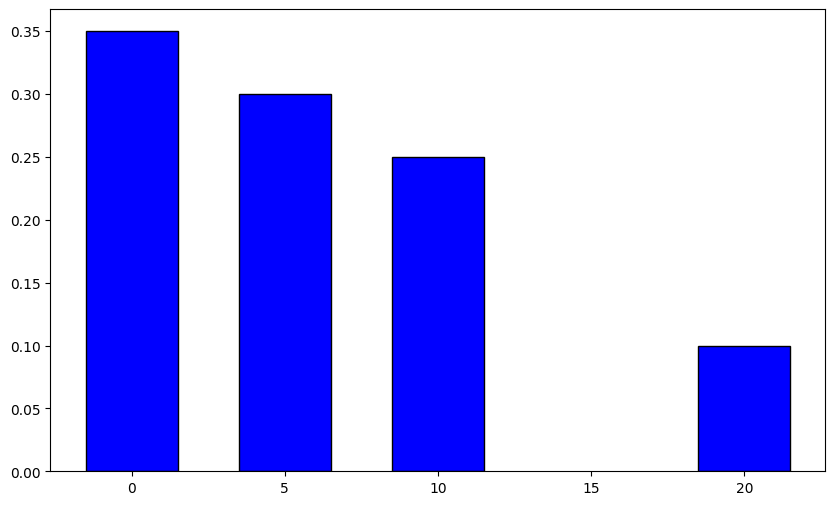

In [4]:
#1, Foundations

slot_machine_proba = [0.35, 0.30, 0.25, 0.1]
slot_machine_payoffs = [0, 5, 10, 20]

import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.bar(slot_machine_payoffs, slot_machine_proba, width=3, color='blue', edgecolor='black')

In [5]:
#task 2, E[R] and Var[R]
def ex_reward(payoffs, proba):
    return f" Expected reward: {sum([payoffs[i] * proba[i] for i in range(len(payoffs))])}"
print(ex_reward(slot_machine_payoffs, slot_machine_proba))

def var_reward(payoffs, proba):
    expected_r = sum([payoffs[i] * proba[i] for i in range(len(payoffs))])      # var(x) = E[x^2] - (E[x])^2
    expected_r2 = sum([(payoffs[i]**2) * proba[i] for i in range(len(payoffs))]) 
    variance = expected_r2 - expected_r**2
    return f" Variance of reward: {variance}"

print(var_reward(slot_machine_payoffs, slot_machine_proba))

#Task 3, 4,  P(R>= 10) ? P(R > 10) ? 

"""Here, one simply sums the probabilities of outcomes with rewards greater than or equal to 10.
=>> P(R >= 10) = P(R = 10) + P(R = 20) = 0.25 + 0.1 = 0.35
follows that P(R > 10) = P(R = 20) = 0.1
"""

#Task 5, P(R > 15), two plays. 
""""  need to sum probability of all outcomes yielding a total reward greater than 15.
in this case, any combo of 20, ex (0, 20 or 20, 20), or 10, 10 etc"""

 Expected reward: 6.0
 Variance of reward: 36.5


'"  need to sum probability of all outcomes yielding a total reward greater than 15.\nin this case, any combo of 20, ex (0, 20 or 20, 20), or 10, 10 etc'

<BarContainer object of 4 artists>

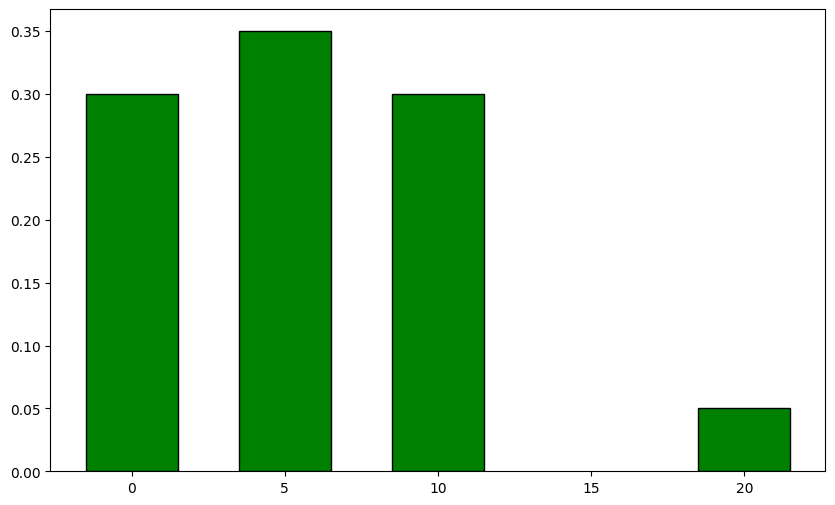

In [6]:
#task 6, second slot machine S

slot2_proba = [0.3, 0.35, 0.3, 0.05]
slot2_payoffs = [0, 5, 10, 20]

plt.figure(figsize=(10,6))
plt.bar(slot2_payoffs, slot2_proba, width=3, color='green', edgecolor='black')

 Expected reward: 5.75
 Variance of reward: 25.6875
[[0.105  0.1225 0.105  0.0175]
 [0.09   0.105  0.09   0.015 ]
 [0.075  0.0875 0.075  0.0125]
 [0.03   0.035  0.03   0.005 ]]
[[ 0  5 10 20]
 [ 5 10 15 25]
 [10 15 20 30]
 [20 25 30 40]]


Text(0, 0.5, 'Probability')

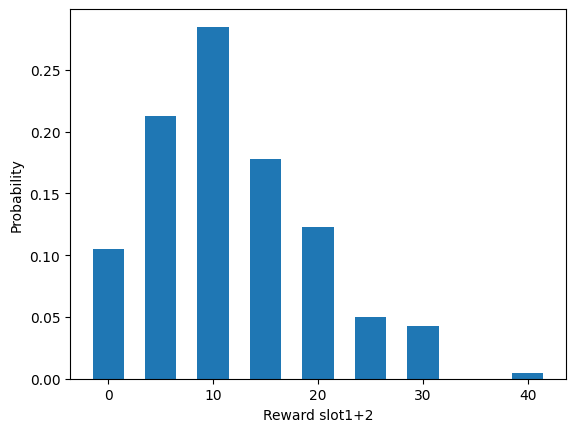

In [14]:
#7, compare slot machines 

print(ex_reward(slot2_payoffs, slot2_proba))
print(var_reward(slot2_payoffs, slot2_proba))


"""id simply chose based on higher ev, but some can argue for variance?"""

#8, dist(P(R, S))? 

import numpy as np 

#need probability and rewards as vectors s.t. can find joint dist, think P(R, S) = P(R) * P(S) assuming independence

rewards_slot1 = np.array(slot_machine_payoffs)
rewards_slot2 = np.array(slot2_payoffs)
proba_slot1 = np.array(slot_machine_proba)
proba_slot2 = np.array(slot2_proba)

joint_dist = np.outer(proba_slot1, proba_slot2)
print(joint_dist)

#9, P(S, R) is identical to P(R, S) if independent
#10, dist sum rewards when playing both? 

sum_rewards = np.add.outer(rewards_slot1, rewards_slot2)
print(sum_rewards)

total_probability = {}

for i in range(len(rewards_slot1)):
    for j in range(len(rewards_slot2)):
        total_reward = rewards_slot1[i] + rewards_slot2[j]
        prob = joint_dist[i][j]
        if total_reward in total_probability:
            total_probability[total_reward] += prob
        else:
            total_probability[total_reward] = prob  

x = sorted(total_probability)  
y = [total_probability[k] for k in x]

plt.bar(x, y, width = 3)
plt.xlabel("Reward slot1+2")
plt.ylabel("Probability")

[(np.float64(0.31999999999999995), np.int64(0)), (np.float64(0.32999999999999996), np.int64(5)), (np.float64(0.28), np.int64(10)), (np.float64(0.07), np.int64(20))]


<BarContainer object of 4 artists>

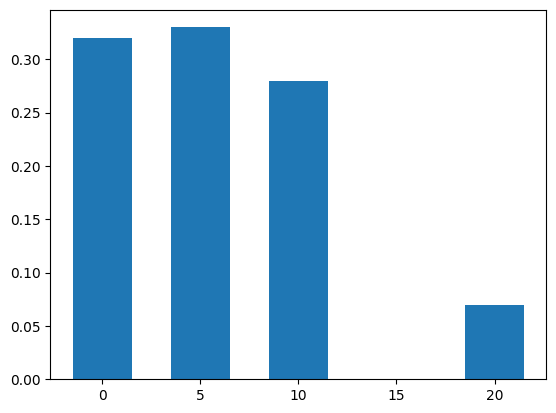

In [17]:
#fist slot-machien with p(s1) = 0.4, second with p(s2) = 0.6

weighted_sum_pmf = 0.4*proba_slot1 + 0.6*proba_slot2     # pmf == probability mass function

print(list(zip(weighted_sum_pmf, rewards_slot1)))     #rewards for slot1, slo2, identical 

plt.bar(rewards_slot1, weighted_sum_pmf, width=3)


In [ ]:
#12, slot machine rewards are independent, so p(s2 <= 10) | p(s1 = 10) simply reduces to  p(s2 <= 10) = 0.65

#13 independent, so p(s2 >=10) = 0.35

#14: Once again, the slot machines are independent wrt. returns, so p(total > 20) | p(s1 = 10) 
# reduces to p(s2 = 20), since 20 is the only reward satifsying the condition. Therefore, 
#P(s1 + s2 > 20 ) | p(s1 = 10) = P(s2 = 20) = 0.05

TASK 2, Bayes formula 

In [ ]:
# on paper, will uplooad photo

SyntaxError: unexpected character after line continuation character (3908690574.py, line 3)

TASK 3, inferring distributions 

In [60]:
from IPython.display import display, Math, Latex

#1. mean D_i 

D_i = [10, 0, 5, 10, 5, 0, 0, 10, 0, 0,]
display(Math(r"Estimating\space with\space sample\space mean: \bar{D} = \frac{1}{n} \sum_{i=1}^{n} D_i"))

print(f"sample mean = {sum(D_i)/10}")
# as the sample mean is closer to Expected_reward of slot2, i suspect slot2. 

"""Ten new samples"""

D_ii = [10, 20, 0, 5, 10, 5, 10, 0, 20, 10]

#new sample estimate with all 20 samples:

print(f"new_mean = {sum(D_i + D_ii)/20}")
#4.
print(f"As the new mean is now closer to expected reward of slot1, i suspect slot1 now.")

#5. 21st sample, consequence on reward? 
print(f"""Expect a 21st sample to affect estimated sample avg. downwards, as expected value of 
both slot1, slot2 are below currrent estimate""")

<IPython.core.display.Math object>

sample mean = 4.0
new_mean = 6.5
As the new mean is now closer to expected reward of slot1, i suspect slot1 now.
Expect a 21st sample to affect estimated sample avg. downwards, as expected value of 
both slot1, slot2 are below currrent estimate


2. Basics of Reinforcement Learning

Exercise 4: Modelling a RL Problem

In [3]:
#1. 

print(f""""Automatic floor sweeping robot: seems sensible intuitively to train with RL, as one can 
      get feedback from the environment over time""")

#2. states, actions, rewards: 

print(f"""for states: position(robot), either wrt. x,y, axis or polar coordinates, tile(floor) can be dirty/clean, battery? 
      for actions: movement along axis or wrt. angle/r(lenght) 
      rewards: + for tile cleaned, - for no change/visiting cleaned tile,  large - for collisions """) # can def be more precise 

#3. 
print(f"This is a control problem")  # think evaluating what action to take given current state 

#4.
print(f"""Given successful training, and now comparing against another robot, the problem becomes an production problem as we are now
      evalutaing how good the performance is compared to another agent""")

#5. metric for comparison:
print(f"""most likely compare total area cleaned / time spent - some collision penalty""")

#6, other robot performes better but collides more, why? 
print(f"""The other robot was probably trained with a higher penalty for time spent, and lower penalty for colliding, incentivizing 
      it to move from state to state more reclessly, with less regard for collisions as long as it cleaned states fasterr""")

#7 concerns with my robot not being competetive enough, change to factories instead of homes? 
print(f"""" This implies a environment change, which intuitively has less penalty for collisions but bigger space to clean, 
      which i would think of as worse for my robot given last tasks comparison""")




"Automatic floor sweeping robot: seems sensible intuitively to train with RL, as one can 
      get feedback from the environment over time
for states: position(robot), either wrt. x,y, axis or polar coordinates, tile(floor) can be dirty/clean, battery? 
      for actions: movement along axis or wrt. angle/r(lenght) 
      rewards: + for tile cleaned, - for no change/visiting cleaned tile,  large - for collisions 
This is a control problem
Given successful training, and now comparing against another robot, the problem becomes an production problem as we are now
      evalutaing how good the performance is compared to another agent
most likely compare total area cleaned / time spent - some collision penalty
The other robot was probably trained with a higher penalty for time spent, and lower penalty for colliding, incentivizing 
      it to move from state to state more reclessly, with less regard for collisions as long as it cleaned states fasterr
" This implies a environment change, wh

Exercise 5, RL assumptions

In [4]:
#Task 1, reinforcement learning for streamlining the interview process? 
print(f""" my take on an artificial interviewing agent: 
      defining the rewards are not easy? and definitions might be severely biased?
      probably better with a supervised machine learrning approach.""")


 my take on an artificial interviewing agent: 
      defining the rewards are not easy? and definitions might be severely biased?
      probably better with a supervised machine learrning approach.


3. Multi-armed Bandits

ex.6.

In [ ]:
#The question here is if one considers MAB's a sensible choice to design deployment of new medicines. 
print(f"""if the question is asking whether one can judge deployment of medicines with MAB's,
      then i would say you are to some extent already doing so, as MAB's is simply estimating reward(sucess) of each slot, 
      only one hopefully does it on rodents etc before deployment. Using MAB's if the slots(vaccines) are tested(sampled) on hyumans,
      it would be reasonable to argue that its unethical""")

Ex7. Hoeffdings ineq. 

In [ ]:
#Calculation on paper, will upload photo
